In [8]:
import pandas as pd
import numpy as np
import random
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules
from wordcloud import WordCloud

In [3]:
np.random.seed(42)
random.seed(42)

In [4]:
addresses = pd.read_csv('DATA/tbl_addresses.csv')
customer_acc = pd.read_csv('DATA/tbl_customer_accounts.csv')
customer_rew = pd.read_csv('DATA/tbl_customer_reviews.csv')
customers = pd.read_csv('DATA/tbl_customers.csv')
reviews = pd.read_csv('DATA/tbl_labelled_reviews.csv')
orders = pd.read_csv('DATA/tbl_orders.csv')
products = pd.read_csv('DATA/tbl_products.csv')

# Preparing the data

In [7]:
customers['job_type'] = customers['job_type'].fillna('Unknown')
customers['email_provider'] = customers['email_provider'].fillna('Unknown')
customers['flag_phone_provided'] = customers['flag_phone_provided'].fillna(0).astype(bool)


customer_acc['activation_date'] = pd.to_datetime(customer_acc['activation_date'])


missing_values = addresses.isnull().sum()
missing_values

imputation_df = addresses[['postal_code', 'district', 'region']]

le_district = LabelEncoder()
le_region = LabelEncoder()

imputation_df['district'] = le_district.fit_transform(imputation_df['district'].astype(str))
imputation_df['region'] = le_region.fit_transform(imputation_df['region'].astype(str))

imputer = KNNImputer(n_neighbors=5)

imputed_data = imputer.fit_transform(imputation_df)

imputed_df = pd.DataFrame(imputed_data, columns=['postal_code', 'district', 'region'])

imputed_df['district'] = le_district.inverse_transform(imputed_df['district'].round().astype(int))
imputed_df['region'] = le_region.inverse_transform(imputed_df['region'].round().astype(int))

addresses['postal_code'] = imputed_df['postal_code']
addresses['district'] = imputed_df['district']
addresses['region'] = imputed_df['region']


orders['purchase_datetime'] = pd.to_datetime(orders['purchase_datetime'])


/Users/diaskarimov/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/diaskarimov/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/var/folders/9r/54xgf7zn6kddvpnb0lh4dgmc0000gn/T/ipykernel_82433/3602852691.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imputation_df['district'] = le_district.fit_transform(imputation_df['district']

# Exploratory Data Analysis

## Age Distribution

/Users/diaskarimov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/diaskarimov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


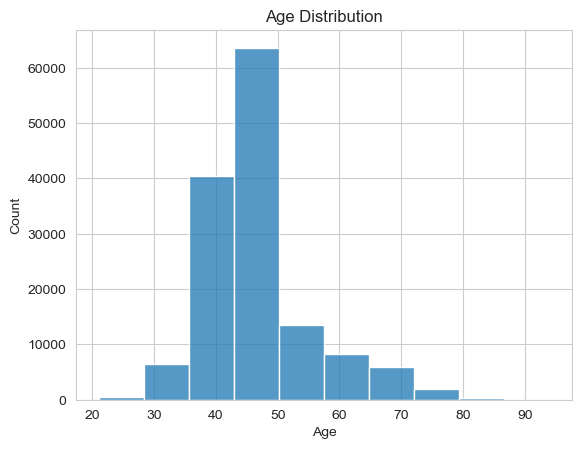

In [8]:
sns.histplot(customers['birthdate'].apply(lambda x: 2024 - int(x.split('-')[0])), bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## Gender Distribution

/Users/diaskarimov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/diaskarimov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/diaskarimov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


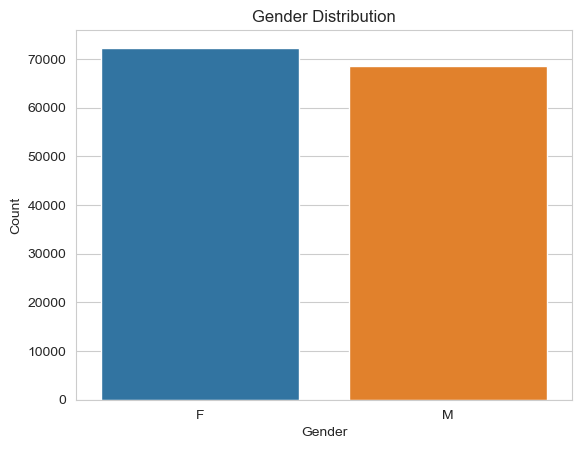

In [9]:
sns.countplot(x='gender', data=customers)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

## Product Class Distribution

/Users/diaskarimov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/diaskarimov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/diaskarimov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


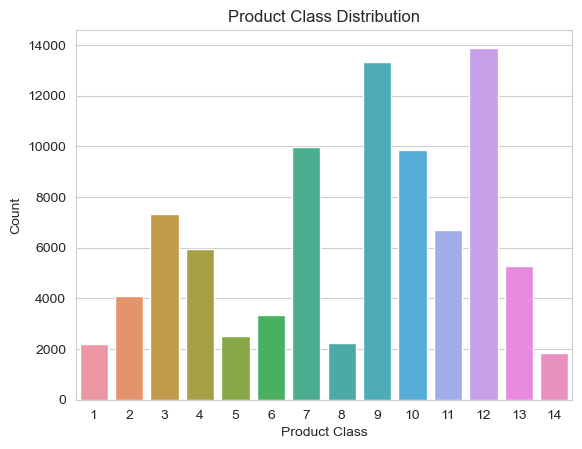

In [10]:
sns.countplot(x='product_class', data=products)
plt.title('Product Class Distribution')
plt.xlabel('Product Class')
plt.ylabel('Count')
plt.show()

## Order Patterns

/var/folders/9r/54xgf7zn6kddvpnb0lh4dgmc0000gn/T/ipykernel_82433/4292046309.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  orders.set_index('purchase_datetime').resample('M').size().plot()


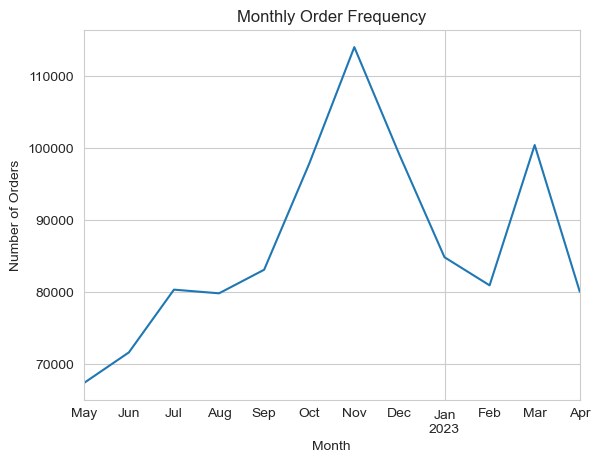

In [11]:
orders.set_index('purchase_datetime').resample('M').size().plot()
plt.title('Monthly Order Frequency')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.show()

## Sentiment Distribution in Reviews


/Users/diaskarimov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/diaskarimov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/diaskarimov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


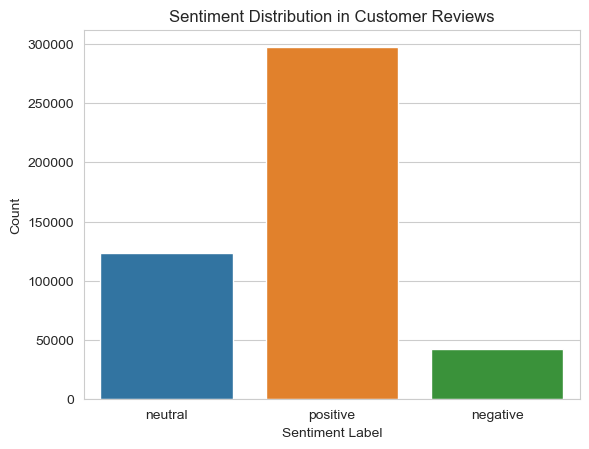

In [12]:
sns.countplot(x='sentiment_label', data=reviews)
plt.title('Sentiment Distribution in Customer Reviews')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()


## Loyalty Type Distribution


/Users/diaskarimov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/diaskarimov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/diaskarimov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


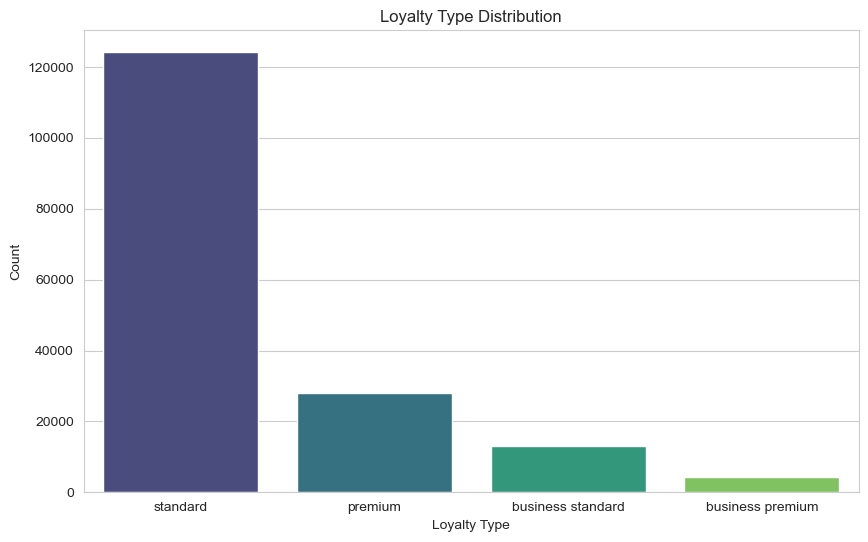

In [13]:
loyalty_type_counts = customer_acc['loyalty_type'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=loyalty_type_counts.index, y=loyalty_type_counts.values, palette='viridis')
plt.title('Loyalty Type Distribution')
plt.xlabel('Loyalty Type')
plt.ylabel('Count')
plt.show()

## Aggregate the number of orders per customer

/Users/diaskarimov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/diaskarimov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/diaskarimov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


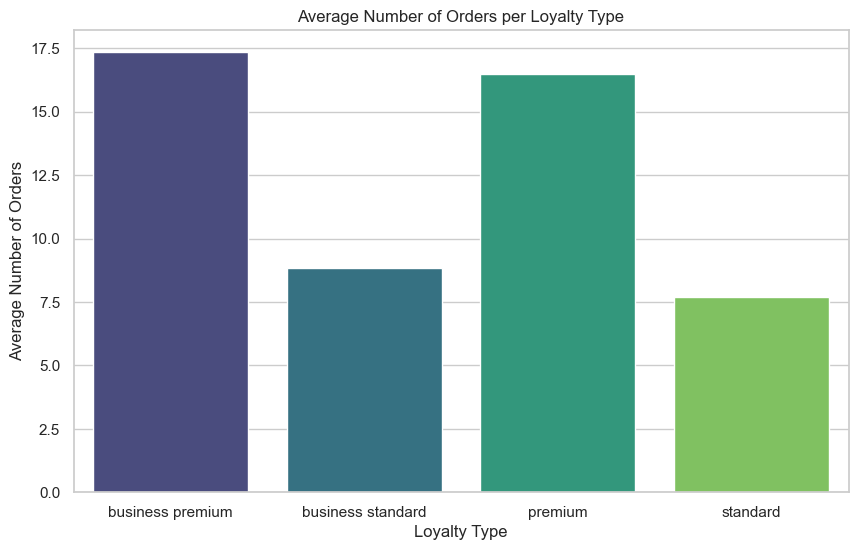

In [14]:
orders_per_customer = orders.groupby('customer_id').size().reset_index(name='num_orders')
customer_orders_loyalty = pd.merge(orders_per_customer, customer_acc[['customer_id', 'loyalty_type']], on='customer_id')
avg_orders_per_loyalty_type = customer_orders_loyalty.groupby('loyalty_type')['num_orders'].mean().reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='loyalty_type', y='num_orders', data=avg_orders_per_loyalty_type, palette='viridis')
plt.title('Average Number of Orders per Loyalty Type')
plt.xlabel('Loyalty Type')
plt.ylabel('Average Number of Orders')
plt.show()

# Number of customers by regions

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


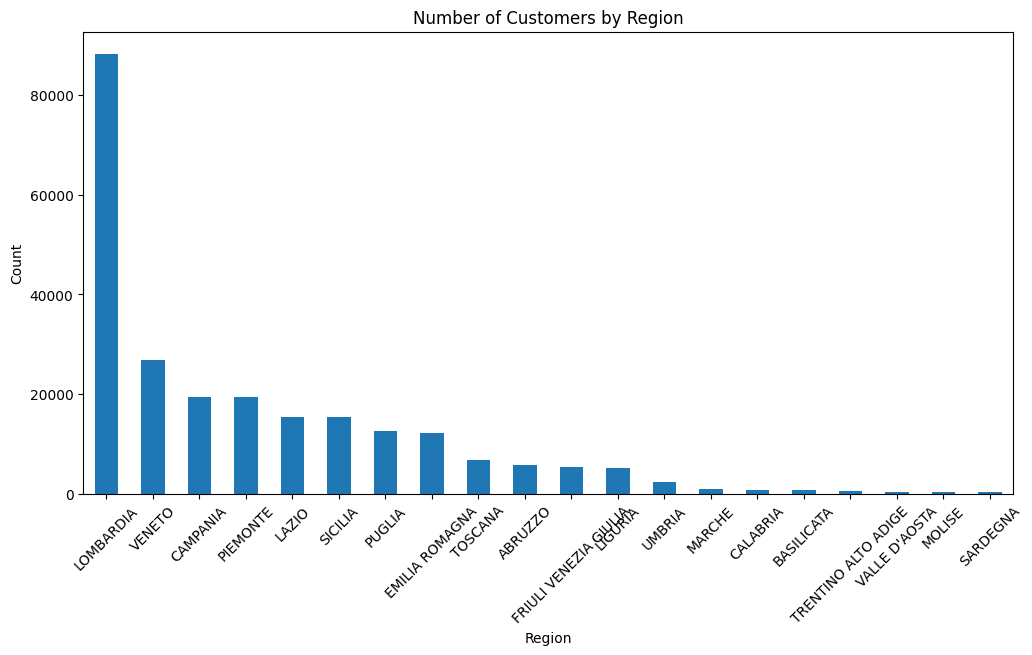

In [5]:
plt.figure(figsize=(12, 6))
addresses['region'].value_counts().plot(kind='bar')
plt.title('Number of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Daily sales over time

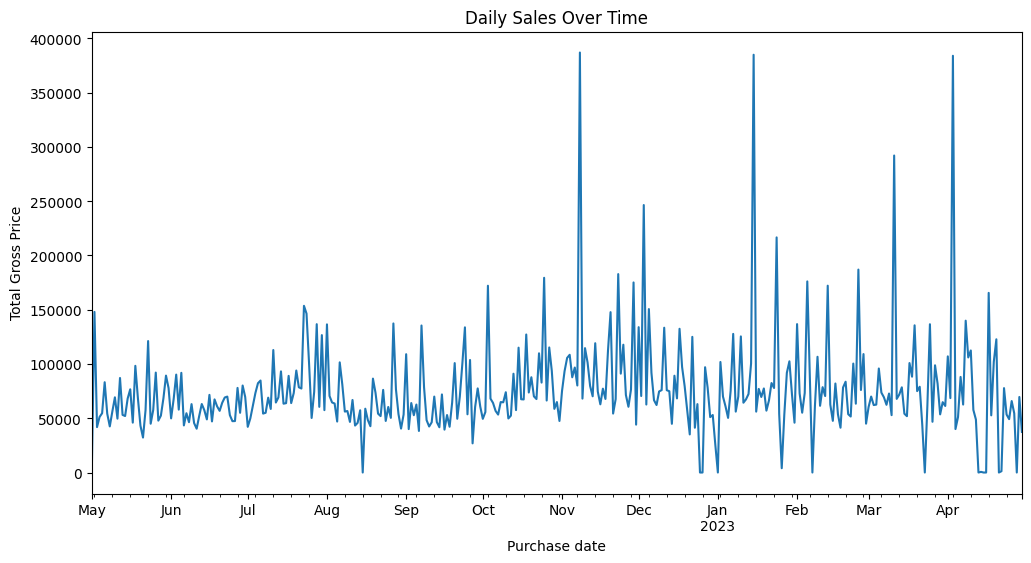

In [6]:
plt.figure(figsize=(12, 6))
orders['purchase_datetime'] = pd.to_datetime(orders['purchase_datetime'])
orders.set_index('purchase_datetime')['gross_price'].resample('D').sum().plot()
plt.title('Daily Sales Over Time')
plt.ylabel('Total Gross Price')
plt.xlabel('Purchase date')
plt.show()

# Word cloud of customers reviews

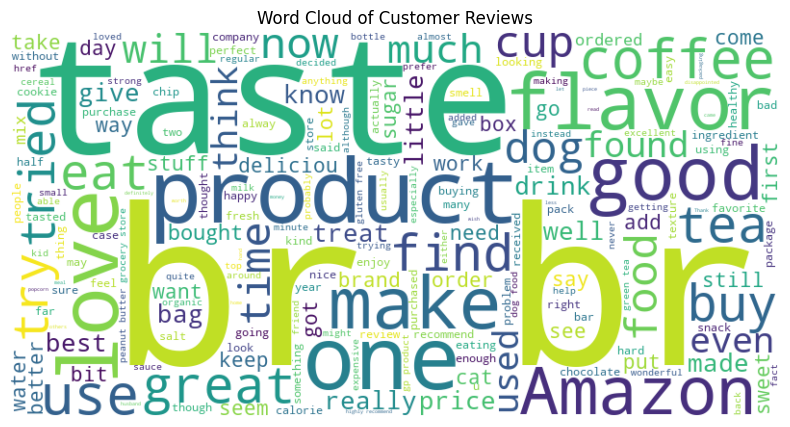

In [9]:
all_reviews = ' '.join(customer_rew['review_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Customer Reviews')
plt.show()